# Chem 30324, Spring 2025, Homework 5
# Due February 28, 2025

## Q1. Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.
<img src="./imgs/HW5-1.png">

### 1. Plot out the normalized $n = 2$ particle-in-a-box wavefunction for an electron in butadiene and the normalized $n = 2$ probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

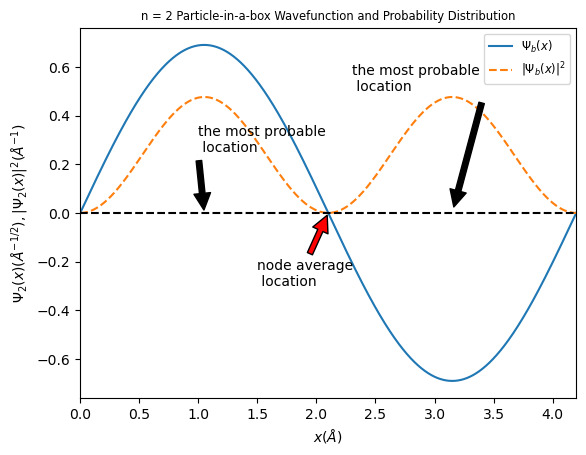

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the box (Angstroms)
L = 3 * 1.4  # Butadiene has four C atoms, so three bonds; scale is Angstrom

# Quantum number
n = 2

# Generate x values from 0 to L with 1000 points
x = np.linspace(0, L, 1000)

# Define the normalized wave function
def psi_but(x):
    return np.sqrt(2 / L) * np.sin((n * np.pi * x) / L)

# Compute the wave function values
psi = psi_but(x)

# Plot the wave function
plt.plot(x, psi, label=r'$\Psi_b(x)$')

# Plot the probability density
plt.plot(x, psi**2, label=r'$|\Psi_b(x)|^2$', linestyle='dashed')

# Add legend
plt.legend(fontsize='small')

# Set x-axis limit
plt.xlim(0, L)

# Label axes
plt.xlabel(r'$x(\AA)$')
plt.ylabel(r'$\Psi_2(x)(\AA^{-1/2}), |\Psi_2(x)|^2(\AA^{-1})$')

# Set title
plt.title(r'n = 2 Particle-in-a-box Wavefunction and Probability Distribution', fontsize='small')

# Draw a horizontal dashed line at y=0
plt.axhline(y=0, color='k', linestyle='--')

# Add annotations for most probable locations and node
plt.annotate('the most probable \n location', xy=(L/4, 0), xytext=(1.0, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('the most probable \n location', xy=(3*L/4, 0), xytext=(2.3, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('node average \n location', xy=(L/2, 0), xytext=(1.5, -0.3),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Show the plot
plt.show()


### 2. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the $n = 1$ and two in the $n = 2$ levels. Compare the wavelength of light (in nm) necessary to promote (“excite”) one electron from either of these levels to the empty $n = 3$ level.

In [47]:
import numpy as np

# Constants
h_bar = 1.05457e-34  # Reduced Planck's constant (J·s)
m_e = 9.10938215e-31 # Electron mass (kg)
bond_length = 1.4e-10  # Bond length in meters
hc = 1230  # eV·nm (Planck's constant * speed of light in nm units)

# Define the energy function in terms of num (number of C) and n (energy level)

# Returns energy in eV
def E(n, num): 
    L = (num - 1) * bond_length  # Correct length for conjugated system
    return ((n**2 * np.pi**2 * h_bar**2) / (2 * m_e * L**2)) * 6.2415e18  # Convert J to eV

# Butadiene has 4 carbons
num = 4

# Compute energy levels
E_n1 = E(1, num)
E_n2 = E(2, num)
E_n3 = E(3, num)

# Energy gaps
E_31 = E_n3 - E_n1  # Transition from n=1 to n=3
E_32 = E_n3 - E_n2  # Transition from n=2 to n=3

# Calculate the wavelength from the energy
lamb_32 = hc / E_32
lamb_31 = hc / E_31

# Print the results
print(f'Wavelength from n=1 to n=3 is {lamb_31:.2f} nm')
print(f'Wavelength from n=2 to n=3 is {lamb_32:.2f} nm')


Wavelength from n=1 to n=3 is 72.13 nm
Wavelength from n=2 to n=3 is 115.40 nm


### 3. The probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert \hat{x}\rvert\psi_{final}\rangle\rvert^2$. Contrast the relative probabilities of an electron jumping from $n = 1$ to $n = 3$ and from $n = 2$ to $n = 3$ levels. Can you propose any general rules about “allowed” and "forbidden" jumps?

In [48]:
from sympy import * # import sympy for symbolic mathematics
#Simplified integrals with wavefunctions not normalized, l = 1
import numpy as np

l=1 # m

x = symbols('x')
# calculate integral of psi1 * x * psi3
a = integrate((sin(np.pi*(x/l))*x*sin(3*np.pi*(x/l))),(x,0,l))
print('Probability of transition from n=1 to n=3 is', a**2)
# calculate integral of psi2 * x * psi3
b = integrate((sin(2*np.pi*(x/l))*x*sin(3*np.pi*(x/l))),(x,0,l))
print('Probability of transition from n=2 to n=3 is', b**2)

Probability of transition from n=1 to n=3 is 0
Probability of transition from n=2 to n=3 is 0.00946112924591708


The probability of jumping from n=1 to n=3 is 0, so it is forbidden, while jumping from n=2 to n=3 is allowed because there is a non-zero number here. More generally these rules apply based on the difference between the two energy states, with an even difference $(\Delta n=2)$ being forbidden while odd differences $(\Delta n=1)$ are allowed.

$ \int_{0}^{L} sin(\frac{n\pi x}{L})*x*sin(\frac{m\pi x}{L}) \,dx = \left \{
  \begin{array}{lr}
    0 & n-m = 2x \\
    > 0 & n-m \neq 2x
      \end{array}
\right.
$

### 4. Consider the reaction of two ethylene molecules to form butadiene:
<img src="./imgs/HW5-2.png">

### 5. As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [49]:
l=1.4e-10# m, length of one C-C bond

# Constants
h_bar = 1.05457e-34  # Reduced Planck's constant (J·s)
m_e = 9.10938215e-31 # Electron mass (kg)
bond_length = 1.4e-10  # Bond length in meters
hc = 1230  # eV·nm (Planck's constant * speed of light in nm units)


def E(n,num):
    return ((n**2*np.pi**2*h_bar**2)/(2*m_e*(l*(num-1))**2)*6.0221e20)# Redefined so that the unit is kJ/mol

E_eth = 2*E(1,2)
E_but = 2*E(1,4) + 2*E(2,4)
E_net = E_but - 2*E_eth
print('\nInitial energy is', E_eth, 'kJ/mol','\nFinal energy is', E_but, 'kJ/mol' ,'\nNet energy is', E_net, 'kJ/mol')


# Experimental enthalpy of formation data from NIST
Ef_ethylene = 52.4 # kJ/mol
Ef_butadiene = 108.8 # kJ/mol
E_reaction = Ef_butadiene - 2*Ef_ethylene # kJ/mol
print('The experimental reaction enthalpy is {:.1f}kJ/mol.'.format(E_reaction))


Initial energy is 3702.145987248957 kJ/mol 
Final energy is 2056.747770693865 kJ/mol 
Net energy is -5347.544203804049 kJ/mol
The experimental reaction enthalpy is 4.0kJ/mol.


Model does not really work for this at all. $\sigma$ bonds are neglected and the infinite potential well is non-physical.

### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

Electrons have a finite probability of going past the ending C atoms.

Energy levels decrease in energy.

States with high enough energies leave the well completely, meaning only a finite number of energy states are bound.

## Q2. Really large box with a particle.
### A gas molecule rattling around in a bottle can be described as a particle in a 3-dimensional box. Consider ethylene gas in a cubic “bottle” 1 dm on a side.

### 7. What is the particle-in-a-box “zero point energy” of one of these ethylene molecules, in kJ/mol? Is this energy of chemical significance?

In [50]:
import numpy as np
l = .1 #length of the box in meters
hbar = 1.05457e-34 #units in J*s
m = 28.053*1.6605e-27# mass of ethylene in kg

#our zero point energy is when nx, ny, nz, are equal to 1, so each of those squared and added is 3
E=3*np.pi**2*hbar**2/(2*m*l**2)#these units are in J per molecule, need to convert to kJ/mol
print(f"{E * 6.022e23 / 1000:.3e} kJ/mol")

2.128e-19 kJ/mol


### 8. According to the kinetic theory of gases, the average kinetic energy of an ethylene molecule in any one direction is $k_B T/2$. What is the approximate value of $n_x$ of a gas molecule in this box and with this kinetic energy at 298 K?

We're going to set this equal to 1D equation from the previous problem and solve for n_x:
\begin{equation}
E_x=\frac{k_B T}{2}=\frac{n_x^2\pi^2\hbar^2}{2mL^2}
\end{equation}

Rearranging:
\begin{equation}
\sqrt{\frac{k_B T m L^2}{\pi^2\hbar^2}}=n_x
\end{equation}

Solve via code:

In [51]:
k=1.38065e-23#Boltzman constant in J/K
T=298#Temp in K
#Using m, l, and hbar variables from question 7
n=np.sqrt(k*T*m*l**2/(np.pi**2*hbar**2))
print("approximate value is ",int(n))

approximate value is  4178628300


### 9. Suppose you can measure the average kinetic energy in a direction within 1 ppm. Estimate the number of $n_x$ within 1 ppm of $k_B T/2$ at 298 K (this is called a "density of states"). Do you have any hope of determining the exact value of $n_x$ for a particular molecule?

We'll solve for the difference in nx between the low and range of our accuracy to  give us the density of states, first looking at the value of $k_BT/2$ at 298 K:

\begin{equation}
E_x=\frac{k_B T}{2}=\frac{n_x^2\pi^2\hbar^2}{2mL^2}
\end{equation}

We'll be changing the KE so we'll leave the equation in terms of $E_x$
\begin{equation}
\sqrt{\frac{2mL^2E_x}{\pi^2\hbar^2}}=n_x
\end{equation}

We want to look at the difference between $n_{low}$ and $n_{high}$
\begin{equation}
\sqrt{\frac{2mL^2E_{high}}{\pi^2\hbar^2}}-\sqrt{\frac{2mL^2E_{low}}{\pi^2\hbar^2}}
\end{equation}
Simplify a bit just for ease of understanding
\begin{equation}
\sqrt{\frac{2mL}{\pi^2\hbar^2}}\sqrt{E_{high}-E_{low}}
\end{equation}

In [52]:
##Energy at the lowest and the highest (Any will work)
KE=k*T/2
lowE=KE-0.000001*KE
highE=KE+0.000001*KE


print(KE,lowE, highE)
# you can see that our detection limits are no where near the precision we need to find

dN=np.sqrt(2*m*l**2/(np.pi**2*hbar**2))*np.sqrt(highE-lowE)

print(int(dN),"different n_x between detection limits")
#No hope on determining exact value



2.0571685000000002e-21 2.0571664428315004e-21 2.0571705571685e-21
5909472 different n_x between detection limits


## Q3. Quantum mechanics of vibrating NO.
### The diatomic nitric oxide (NO) is an unusual and important molecule. It has an odd number of electrons, which is a rarity for stable molecule. It acts as a signaling molecule in the body, helping to regulate blood pressure, is a primary pollutant from combustion, and is a key constituent of smog. It exists in several isotopic forms, but the most common, ${}^{14}$N= ${}^{16}$O, has a bond length of 1.15077 Å and vibrational force constant of 1594.8 N/m.

### 10. Compute the **reduced mass** $\mu$ (amu), **harmonic vibrational frequency** (cm$^{-1}$), and **zero point vibrational energy** (kJ/mol) of  ${}^{14}$N= ${}^{16}$O.  Recall $1/\mu=1/M_\text{N} + 1/M_\text{O}$.

In [53]:
import math
from scipy.constants import hbar, h, pi, N_A

M_O = 15.995  # Oxygen atomic mass in amu
M_N = 14.003  # Nitrogen atomic mass in amu
k = 1594.8  # Vibrational force constant in N/m
c = 3e10  # Speed of light in cm/s

# Convert to atomic mass unit (amu) -> kg
mu = (1/M_O + 1/M_N) ** -1  # Reduced mass in amu
mu_kg = mu * 1.66054e-27  # Convert amu to kg
print(f"Reduced mass 𝜇: {mu:.3e} amu")

# Calculate vibrational frequency
nu = (1 / (2 * pi)) * (k / mu_kg) ** 0.5  # Frequency in Hz
freq = nu / c  # Frequency in cm^-1
print(f"Harmonic vibrational frequency: {freq:.1f} cm^-1")

# Calculate zero-point energy (ZPE)
E_0 = 0.5 * h * nu  # Energy in J
E_0_kJmol = E_0 * N_A / 1000  # Convert to kJ/mol
print(f"Zero point vibrational energy: {E_0:.3e} J")
print(f"Zero point vibrational energy: {E_0_kJmol:.3f} kJ/mol")

Reduced mass 𝜇: 7.466e+00 amu
Harmonic vibrational frequency: 1902.7 cm^-1
Zero point vibrational energy: 1.891e-20 J
Zero point vibrational energy: 11.389 kJ/mol


### 11. Calculate the classical minimum and maximum values of the $^{14}$N=$^{16}$O bond length for a molecule in the ground vibrational state. Hint: Calculate the classical limits on $x$, the value of $x$ at which the kinetic energy is 0 and thus the total energy equals the potential energy.

In [54]:
# Hint: Total E = V (potential E)
# Harmonic Oscillator: V = kx**2/2 for vibration
x = math.sqrt(E_0*2/k) * 10**10 #[=]A
# calculate bond length
R_min = 1.15077-x # 1.15077A is the most common bond length
print(f'minimum value of bond length: {R_min:.3f}A')
R_max = 1.15077+x
print(f'maximum value of bond length: {R_max:.3f}A')

minimum value of bond length: 1.102A
maximum value of bond length: 1.199A


### 12. The normalized ground vibrational wavefunction of N=O can be written
$$\Psi_{\upsilon=0}(x) = \left ({\frac{1}{\alpha\sqrt{\pi}}}\right )^{1/2}e^{-x^2/2\alpha^2}, \quad x = R-R_{eq}, \quad \alpha = \left ({\frac{\hbar^2}{\mu k}}\right )^{1/4}$$
### where $x = R-R_{eq}$.  Plot the normalized probability of $x$ vs $x$. Indicate on your plot the classical limits on $x$. Do the probabilities vanish beyond those classical limits? What do we call this behavior?

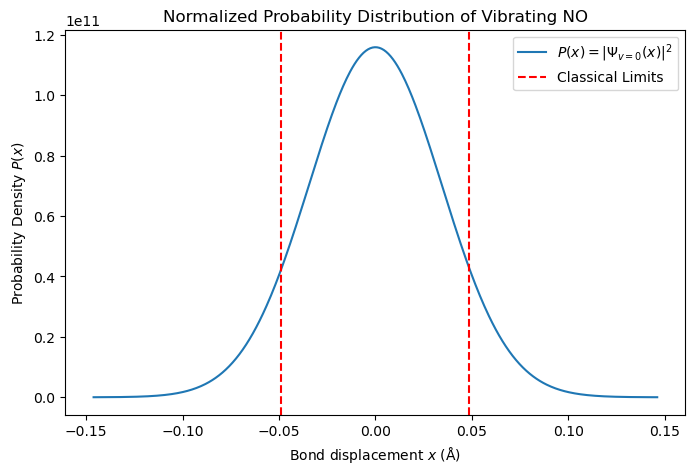

beyond the classical limits, it will behave Quantum Mechanics


In [55]:
import matplotlib.pyplot as plt

alpha = (hbar**2 / (mu* 1.66054e-27 * k))**0.25
x_classical = x*10**-10 # x from the previous question

def P(x):
    return (1 / (alpha * np.sqrt(pi))) * np.exp(-x**2 / alpha**2)

x_vals = np.linspace(-3 * alpha, 3 * alpha, 500)
P_vals = P(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals * 1e10, P_vals, label=r'$P(x) = |\Psi_{v=0}(x)|^2$')  # Convert x to Angstroms
plt.axvline(x_classical * 1e10, color='r', linestyle='--', label='Classical Limits')
plt.axvline(-x_classical * 1e10, color='r', linestyle='--')
plt.xlabel(r'Bond displacement $x$ (Å)')
plt.ylabel(r'Probability Density $P(x)$')
plt.title(r'Normalized Probability Distribution of Vibrating NO')
plt.legend()
plt.show()
print("beyond the classical limits, it will behave Quantum Mechanics")

### 13. The *general selection rule* for whether light can excite a vibration of a molecule is that the dipole moment of the molecule must change as it vibrates.  Based on this criterion, do you expect NO to exhibit an absorption vibrational spectrum?

In [56]:
print('Yes, I expect to see absorption specturm because molecule has dipole that changes w/ vibration. It is IR active')

Yes, I expect to see absorption specturm because molecule has dipole that changes w/ vibration. It is IR active


### 14. The *specific selection rule* for whether light can excite a vibration of a molecule is that $\Delta v = \pm 1$.  At ambient temperature, what initial and final vibrational states would contribute most significantly to an NO vibrational spectrum? Justify your answer. (*Hint:* What does the Boltzmann distribution say about the probability to be in each $\nu$ state?)

At ambient temperature, the probability ratio between the ground state (0) and the first excited state is given by 
\begin{equation}
\frac{P(v=1)}{P(v=0)} = \frac{\exp\left(-\frac{h\nu \cdot 3}{2kT}\right)}{\exp\left(-\frac{h\nu \cdot 1}{2kT}\right)}
\end{equation}

which is nearly zero. This implies that the denominator is significantly larger than the numerator, indicating that the majority of the probability is concentrated in the ground state.

### 15. Based on your answers to questions 13 and 14, what do you expect the vibrational spectrum of an ${}^{14}N={}^{16}O$ molecule to look like? If it has a spectrum, in what region of the spectrum does it absorb (e.g., ultraviolet, x-ray, ...)?

The light emmitted from the first excited state to the ground state is hv, which is 1401.75cm^-1, and this is in the IR region

## Q4. Two-dimensional harmonic oscillator
### Imagine an H atom embedded in a two-dimensional sheet of MoS$_2$.  The H atom vibrates like a two-dimensional harmonic oscillator with mass 1 amu and force constants $k_x$ and $k_y$ in the two directions.

### 16. Write down the Schr&ouml;dinger equation for the vibrating H atom. Remember to include any boundary conditions on the solutions.

Equation:
\begin{equation}
-\frac{\hbar^2}{2m}(\frac{\delta^2 \psi(x)}{\delta x^2}+\frac{\delta^2 \psi(y)}{\delta y^2})+(\frac{K_x x^2}{2}+ \frac{K_y y^2}{2})\psi(x,y)=E\psi(x,y)
\end{equation}
Boundary Conditions:
\begin{equation}
\lim_{x->\pm\infty}\psi(x,y)=0
\end{equation}

\begin{equation}
\lim_{y->\pm\infty}\psi(x,y)=0
\end{equation}

### 17. The  Schr&ouml;dinger equation is *seperable*, so the wavefunctions are products of one-dimensional wavefunctions and the eigenenergies are sums of corresponding one-dimensional energies.  Derive an expression for the H atom vibrational energy states, assuming $k_x = k_y/4 = k$.

The solutions to the 1D Harmonic oscillator are given in Lecture 7:
v represents the vibrational quantum state
and $\nu$ is the frequency
\begin{equation}
\nu_i = \frac{1}{2\pi}\sqrt{\frac{k_i}{m}}
\end{equation}

\begin{equation}
E_v = (v+\frac{1}{2})h\nu
\end{equation}

First solve $\nu_x$ and $\nu_y$ and put the answer in terms of k and see how they relate to each other
\begin{equation}
\nu_x = \frac{1}{2\pi}\sqrt{\frac{k_x}{m}}=\frac{1}{2\pi}\sqrt{\frac{k}{m}}=\nu
\end{equation}

\begin{equation}
\nu_y = \frac{1}{2\pi}\sqrt{\frac{k_y}{m}}=\frac{1}{2\pi}\sqrt{\frac{4k}{m}}=\frac{1}{\pi}\sqrt{\frac{k}{m}}=2\nu
\end{equation}

\begin{equation}
E_{tot}= E_x +E_y = (v_x+\frac{1}{2})h\nu_x+(v_y+\frac{1}{2})h\nu_y = (v_x+\frac{1}{2})h\nu+(v_y+\frac{1}{2})h2\nu
\end{equation}

\begin{equation}
E_{tot}= h\nu v_x+\frac{h\nu}{2}+2h\nu v_y+h\nu=\frac{3h\nu}{2}+h\nu(v_x+2v_y)
\end{equation}

where $v_x$ and $v_y$ are positive integers

### 18. A spectroscopic experiment reveals that the spacing between the first and second energy levels is 0.05 eV. What is $k$, in N/m?

So the first step is figuring out that the first two energy levels are (0,0) and (1,0) since (0,1) is higher in energy

\begin{equation}
E_{0,0}=\frac{3h\nu}{2}
\end{equation}

\begin{equation}
E_{1,0}=\frac{5h\nu}{2}
\end{equation}

Plug in our equation for $\nu$ and solve the difference for k
\begin{equation}
dE=E_{1,0}-E_{0,0}=h\nu=h\frac{1}{2\pi}\sqrt{\frac{k}{m}}
\end{equation}

Make sure your units make sense when you initialize variables
\begin{equation}
(\frac{2\pi(dE)m^{1/2}}{h})^2=k
\end{equation}

In [57]:
#We're converting everyhing to SI base on initialization
dE = 0.05*1.60218e-19# difference in energy in Joules
print(dE)
m = 1.66054e-27 #mass in kg
h = 6.6260715e-34 #J s
k=((2*np.pi*dE*np.sqrt(m))/(h))**2
print(f"{k:.2f} N/m")

8.0109e-21
9.58 N/m


 ### 19. What are the *energies* and *degeneracies* of the four lowest-energy vibrational levels of the H atom?

We've already stated that (0,0) and (1,0) are the lowest:

\begin{equation}
E_{0,0}=\frac{3h\nu}{2}
\end{equation}

\begin{equation}
E_{1,0}=\frac{5h\nu}{2}
\end{equation}

We can check (0,1), (2,0), and (1,1)
\begin{equation}
E_{0,1}=\frac{7h\nu}{2}
\end{equation}

\begin{equation}
E_{2,0}=\frac{7h\nu}{2}
\end{equation}

\begin{equation}
E_{1,1}=\frac{9h\nu}{2}
\end{equation}

(0,0) and (1,0) are singly degenerate/unique while (0,1) and (2,0) are doubly degenerate